In [139]:
# Our Target is to Predict the income class of an individual using Logistic Regression.
# the Dataset "Adult" is obtained from kaggle.

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [141]:
# importing the dataset
df = pd.read_csv('C:\\Users\\ROOPKATHA\\Documents\\CV prep\\Income class prediction using Logistic Regression\\adult.csv')

Exploring the dataset

In [142]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [143]:
df.shape

(32561, 15)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [145]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [146]:
# shecking for null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [147]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [148]:
# replacing the '?'-s with Null values
df[df=='?']=np.NAN

In [149]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [150]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [151]:
'''
workclass, occupation and native.country have null values in them
and all of them are categorical variables (objects).

we can impute the null values using the modal class 
for each of the variables.

''' 

'\nworkclass, occupation and native.country have null values in them\nand all of them are categorical variables (objects).\n\nwe can impute the null values using the modal class \nfor each of the variables.\n\n'

In [152]:
for a in ['workclass','occupation','native.country']:
    df[a].fillna(df[a].mode()[0],inplace=True)

In [153]:
df.isnull().sum()

# null values are imputed.

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [154]:
df['income'].value_counts(normalize=True)*100

# imbalanced class

<=50K    75.919044
>50K     24.080956
Name: income, dtype: float64

In [157]:
# creating the feature and the target variable.
# our Target variable is the income and all other variables are featires or predictors.

X = df.drop('income',axis = 1) #feature set.
Y = df['income'] # target variable.

In [163]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [164]:
Y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

In [160]:
'''
Now we need to encode the categorical variables and scale the numeric variables.
all the categorical variables, except education, are nominal in nature.
therefore I am choosing dummy variables for the categorical variables
And for the numeric variables, I am going with the Min-max scaler since the dummified 
values would be in the range of 0-1.

'''


'\nNow we need to encode the categorical variables and scale the numeric variables.\nall the categorical variables, except education, are nominal in nature.\ntherefore I am choosing One-hot encoding for the categorical variables (majority wins)\nAnd for the numeric variables, I am going with the Min-max scaler since one-hot encoding \nis being used for the categorical variables here in the dataset. \nwhich means all the encoded values would be in the range of 0-1.\n\n'

In [165]:
from sklearn import preprocessing

In [166]:
categorical = ['workclass','education','marital.status','occupation','relationship','race','sex','native.country']
X = pd.get_dummies(X, columns=categorical, drop_first=True)

In [167]:
X.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,9,0,4356,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,82,132870,9,0,4356,18,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,66,186061,10,0,4356,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,3900,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,3900,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [168]:
# Numeric features.

from sklearn.preprocessing import MinMaxScaler

numeric = ['age','fnlwgt','education.num', 'capital.gain','capital.loss','hours.per.week']

z = MinMaxScaler()

# Fitting and transforming the numeric columns
X[numeric] = z.fit_transform(X[numeric])


In [169]:
X.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,1.000000,0.043987,0.533333,0.0,1.000000,0.397959,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.890411,0.081896,0.533333,0.0,1.000000,0.173469,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.671233,0.118021,0.600000,0.0,1.000000,0.397959,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.506849,0.086982,0.200000,0.0,0.895317,0.397959,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.328767,0.171404,0.600000,0.0,0.895317,0.397959,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


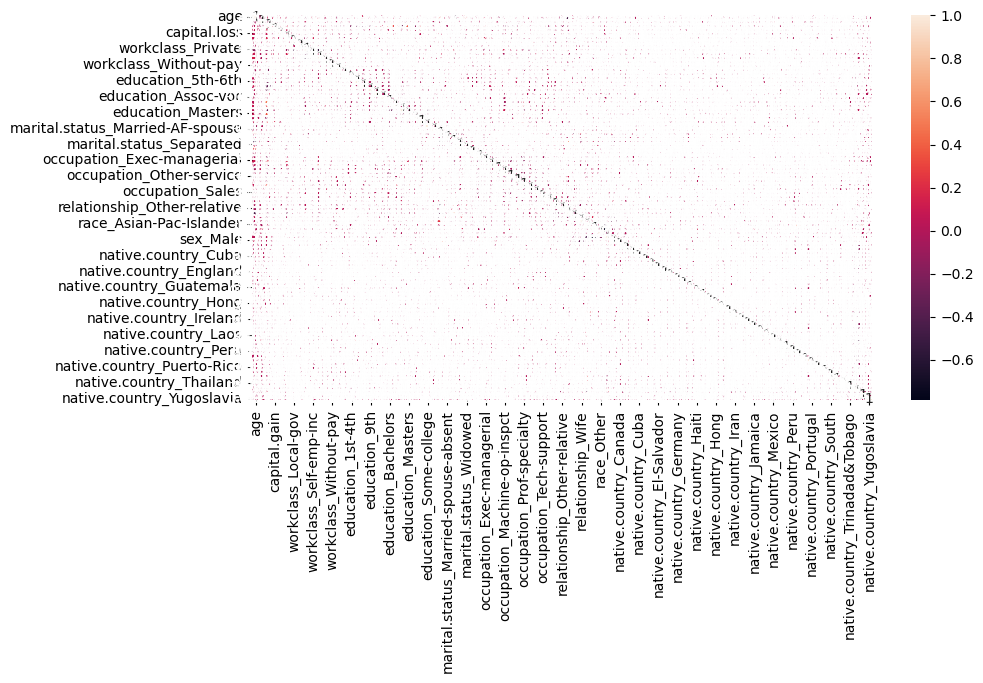

In [170]:
# feature selection
# there can be features in the dataset which are highly correleated
# we need to remove these features to avoid the problem of multicollinearity.

# checking the correlation between the features at the feature set

plt.figure(figsize = (10,5) )
cor = X.corr()
sns.heatmap(cor,annot=True)
plt.show()

In [171]:
# we will define a function now from which we will be able to select the highly correlated featres
# it will give us the first feature that is correlated with any other feature
# then we will remove those related features from our feature set.


def correlation(dataset,threshold):# threshold is the correlation value above which the elimination would start
    corr_cols = set()
    corr_matrix = dataset.corr()
    for i in range(len(dataset.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                corr_cols.add(corr_matrix.columns[i])
    return corr_cols

In [172]:
# dropping features from the feature set which have a correlation of more than 25%, we get -->

X = X.drop(list(correlation(X,0.25)), axis = 1)
X.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Never-worked,workclass_Without-pay,education_11th,...,native.country_Peru,native.country_Poland,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_Vietnam,native.country_Yugoslavia
0,1.000000,0.043987,0.533333,0.0,1.000000,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.890411,0.081896,0.533333,0.0,1.000000,0.173469,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.671233,0.118021,0.600000,0.0,1.000000,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.506849,0.086982,0.200000,0.0,0.895317,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.328767,0.171404,0.600000,0.0,0.895317,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
# splitiing the model in training and test dataset.
# I have chosen 70% of the data for training and the remaining 30% for testing.

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [190]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, Y_train)

In [191]:
y_resampled.value_counts()

<=50K    17310
>50K     17310
Name: income, dtype: int64

In [192]:
# now we'll use the Logistic regression model.

from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(X_resampled, y_resampled)
Y_predicted=logreg.predict(X_test)


In [193]:
# Now we have to check how well the model fits the real data
# I have used the following metrics - accuracy score, Precision, recall and F1-score.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# we have to mention the target class positive label here since target variable contains the values '<=50K' and '>50K', not numeric values like 0 and 1.
pos_label = '>50K'  

accuracy = accuracy_score(Y_test, Y_predicted)
precision = precision_score(Y_test, Y_predicted, pos_label=pos_label)
recall = recall_score(Y_test, Y_predicted, pos_label=pos_label)
F1_score = f1_score(Y_test, Y_predicted, pos_label=pos_label)

print('Accuracy:', accuracy*100)
print('Precision:', precision*100)
print('Recall:', recall*100)
print('F1-Score:', F1_score*100)


Accuracy: 77.00890572218242
Precision: 51.609228140131016
Recall: 76.8122085629504
F1-Score: 61.737649063032364


In [92]:
# since we are using SMOTE the class imbalance is taken care of.
# so Accuracy can be taken a good measure for the model.
# and the accuray value tells us that the model is around 77% accurate to reflect the real data.